# Sampling from a GP

## Preliminary steps

### Loading necessary packages

In [1]:
using Plots
using AugmentedGaussianProcesses
using Distributions
using LinearAlgebra

### Loading the banana dataset from OpenML

In [2]:
kernel = SqExponentialKernel()
x = range(0, 10, length=50)
K = kernelmatrix(kernel, x)
f = rand(MvNormal(K + 1e-8I)) # Sample a random GP
y = rand.(Bernoulli.(AGP.logistic.(f)))
y_sign = sign.(y .- 0.5)

50-element Vector{Float64}:
 -1.0
  1.0
  1.0
  1.0
  1.0
  1.0
 -1.0
  1.0
  1.0
  1.0
  ⋮
  1.0
  1.0
  1.0
  1.0
  1.0
  1.0
 -1.0
  1.0
 -1.0

### We create a function to visualize the data

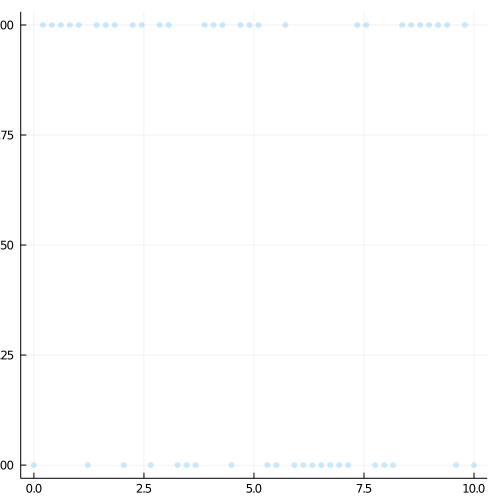

In [3]:
function plot_data(x, y; size=(300,500))
    Plots.scatter(x,
                y,
                alpha=0.2,
                markerstrokewidth=0.0,
                lab="",
                size=size
            )
end
plot_data(x, y; size = (500, 500))

### Run the variational gaussian process approximation

In [4]:
@info "Running full model"
mfull = VGP(x, y_sign,
            kernel,
            LogisticLikelihood(),
            AnalyticVI(),
            optimiser = false
            )
@time train!(mfull, 5)

┌ Info: Running full model
└ @ Main.##477 string:1
  0.759460 seconds (1.14 M allocations: 66.331 MiB, 99.29% compilation time)


### We can also create a sampling based model

In [5]:
@info "Sampling from model"
mmcmc = MCGP(x, y,
            kernel,
            LogisticLikelihood(),
            GibbsSampling(),
            optimiser = false
            )
m = mmcmc
@time samples = sample(mmcmc, 1000)

┌ Info: Sampling from model
└ @ Main.##477 string:1
Sampling with Gibbs Sampler   0%|                       |  ETA: N/A
Sampling with Gibbs Sampler   0%|▏                      |  ETA: 0:05:54
Sampling with Gibbs Sampler   1%|▎                      |  ETA: 0:02:59
Sampling with Gibbs Sampler   1%|▍                      |  ETA: 0:01:59
Sampling with Gibbs Sampler   2%|▍                      |  ETA: 0:01:29
Sampling with Gibbs Sampler   2%|▌                      |  ETA: 0:01:11
Sampling with Gibbs Sampler   3%|▋                      |  ETA: 0:00:59
Sampling with Gibbs Sampler   3%|▊                      |  ETA: 0:00:50
Sampling with Gibbs Sampler   4%|▉                      |  ETA: 0:00:44
Sampling with Gibbs Sampler   4%|█                      |  ETA: 0:00:39
Sampling with Gibbs Sampler   5%|█                      |  ETA: 0:00:35
Sampling with Gibbs Sampler   5%|█▏                     |  ETA: 0:00:32
Sampling with Gibbs Sampler   5%|█▎                     |  ETA: 0:00:29
Sampling with Gi

1000-element Vector{Vector{Vector{Float64}}}:
 [[-0.3763241201753853, 0.2314944785107954, 0.8904428163844685, 1.4658410920961809, 1.9343425928230107, 2.2625590647796496, 2.410473704377158, 2.370335083524443, 2.187292128780941, 1.8897371539920753  …  0.8707541815481459, 1.3475777708614638, 1.7586696166564697, 2.048422831390312, 2.1244496983110945, 1.9739234970654898, 1.6335492104672706, 1.224882878941984, 0.7760868340006208, 0.35574056437931073]]
 [[0.6074636337566164, 0.861690387367452, 1.137847085408956, 1.3365894974194754, 1.4812318660180837, 1.5328351939103848, 1.4541733668978853, 1.3040067009995178, 1.0884660848361927, 0.8125088840110023  …  0.2034640489223913, 0.28916316335013864, 0.30709478543404983, 0.29871395541665935, 0.20899069367605605, 0.14330186991684102, 0.15469398581584148, 0.1573272896229576, 0.21759219076387964, 0.3129003571555159]]
 [[0.740167154534805, 0.6049178704385249, 0.44377881015391374, 0.32855385803467185, 0.23406192648601165, 0.22095415378955163, 0.1991587067

### We can now visualize the results of both models

### We first plot the latent function f (truth, the VI estimate, the samples)

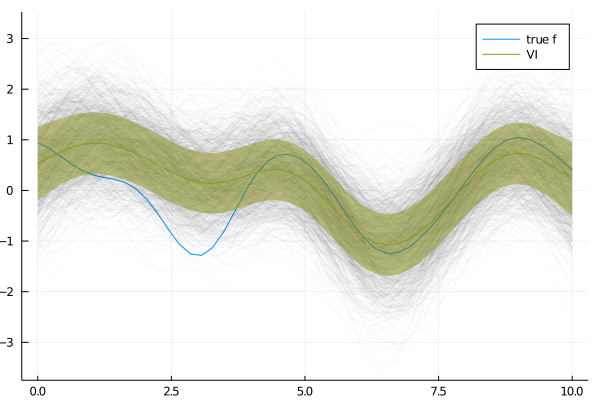

In [6]:
p1 = plot(x, f, label="true f")
plot!(x, samples, label="", color=:black, alpha=0.02, lab="")
plot!(x, mean(mfull[1]), ribbon=sqrt.(var(mfull[1])), label="VI")

### And we can also plot the predictions vs the data

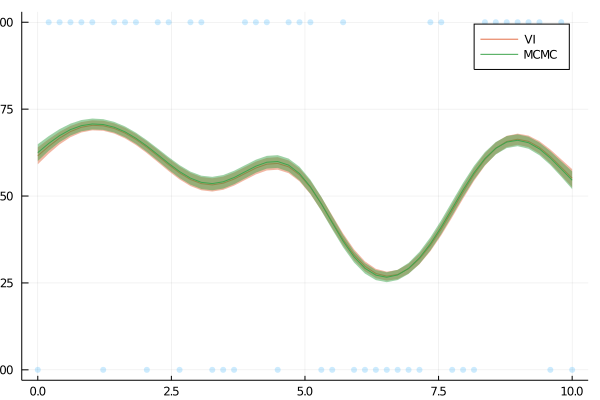

In [7]:
p2 = plot_data(x, y; size=(600,400))
μ_vi, σ_vi = proba_y(mfull, x)
plot!(x, μ_vi; ribbon=σ_vi, label="VI")
μ_mcmc, σ_mcmc = proba_y(mmcmc, x)
plot!(x, μ_mcmc; ribbon=σ_mcmc, label="MCMC")

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*